## **Sebastián Acevedo Espinoza** _desafío 3_

In [1]:
#importando las  librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
#cargando el dataset
df= pd.read_excel('Telco-Customer-Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#revisnado los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#revisando las estadisticas descriptivas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
# Ver valores únicos por columna
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [6]:
# Configuraciones generales de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [7]:
# Revisando los valores nulos
print(df.isnull().sum())

# A veces 'TotalCharges' tiene problemas de tipo
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())  # Ver cuántos fueron convertidos a NaN

# Eliminando las filas con valores nulos (o imputar)
df = df.dropna()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
11


C:\Users\sebas\AppData\Local\Temp\ipykernel_25620\1259748645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


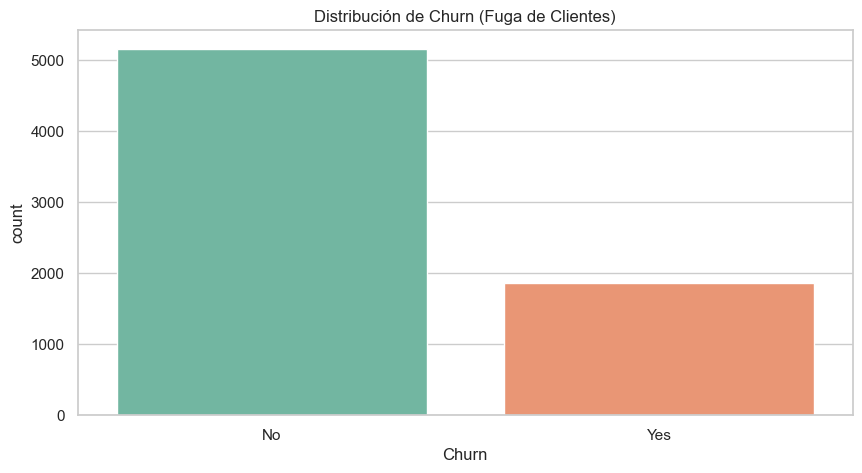

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [8]:
#Graficando la distribucion de Churn
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribución de Churn (Fuga de Clientes)')
plt.show()

# Porcentaje
print(df['Churn'].value_counts(normalize=True)*100)


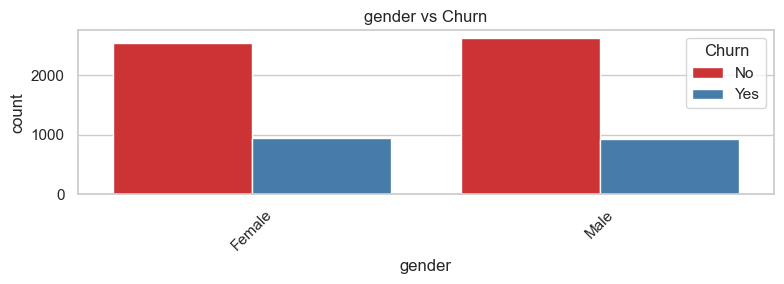

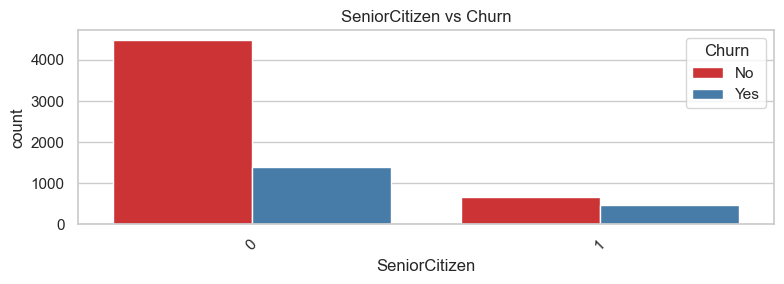

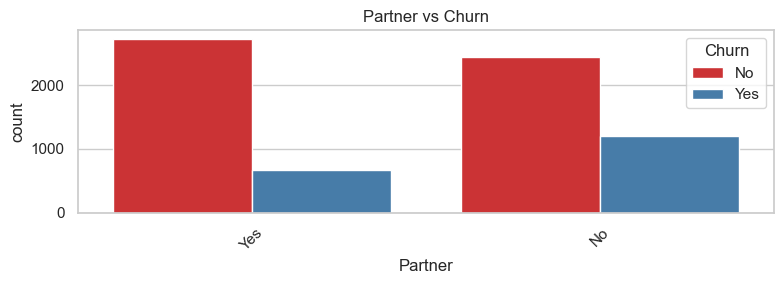

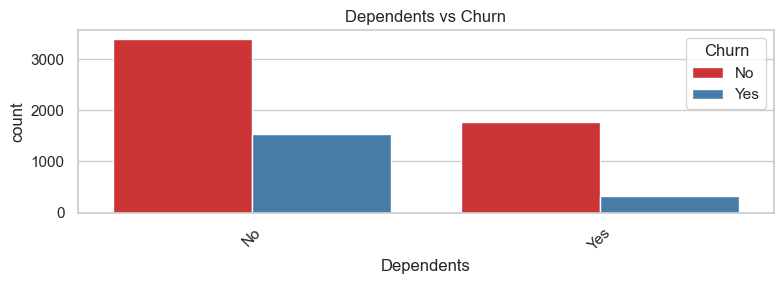

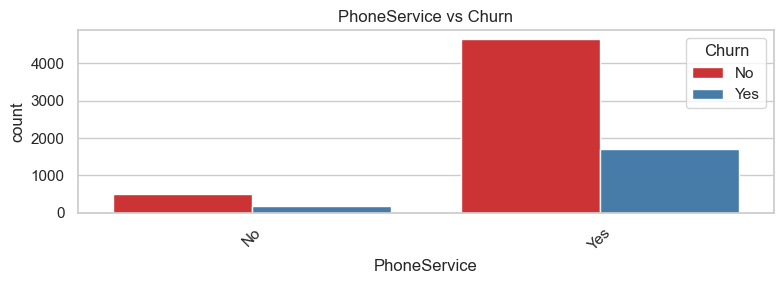

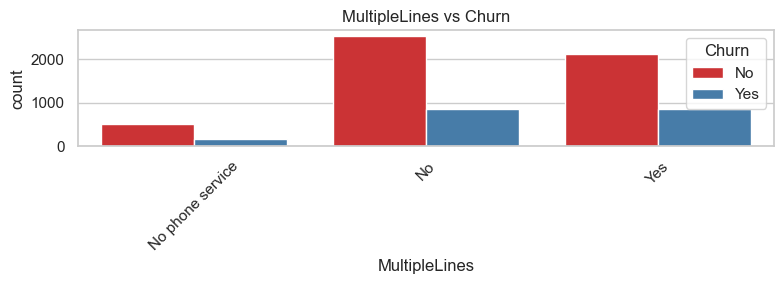

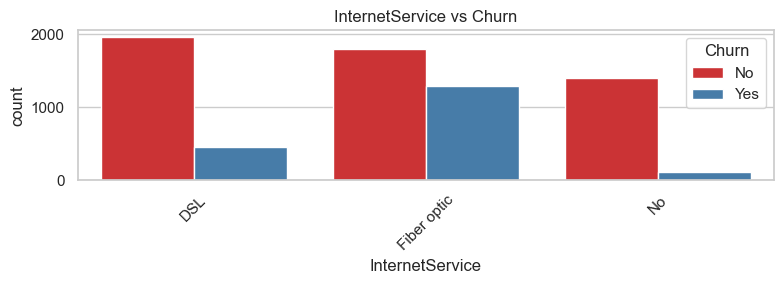

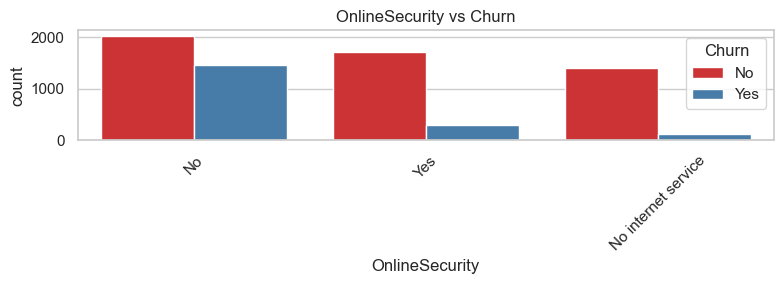

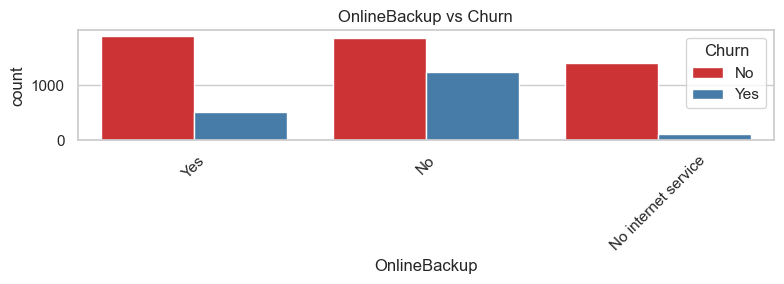

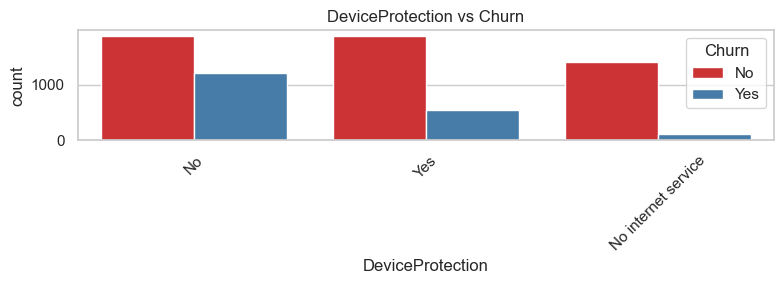

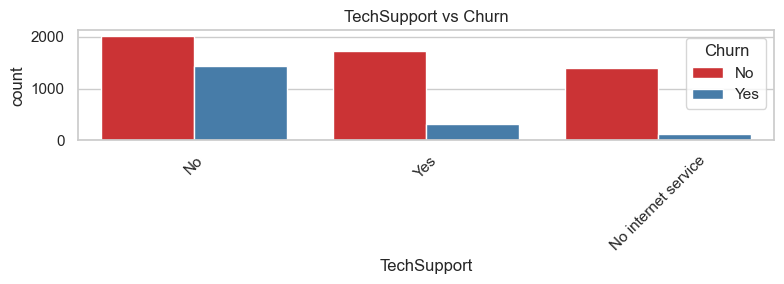

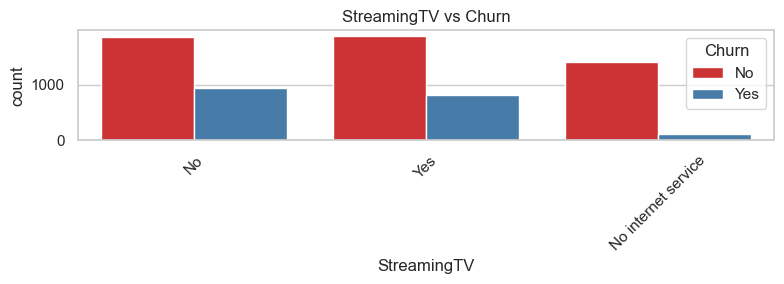

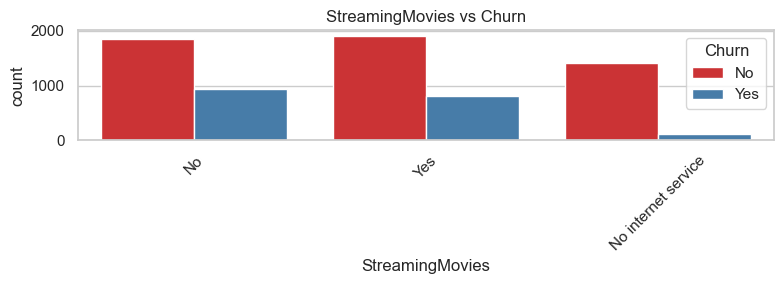

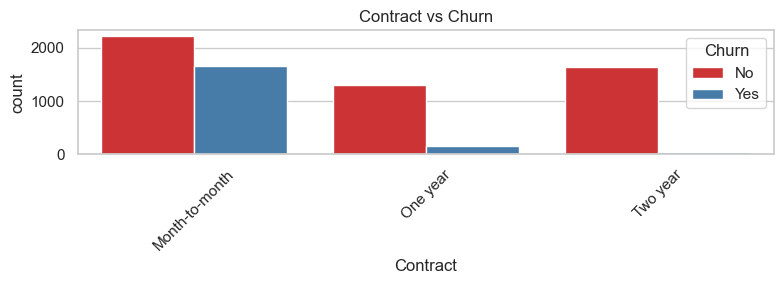

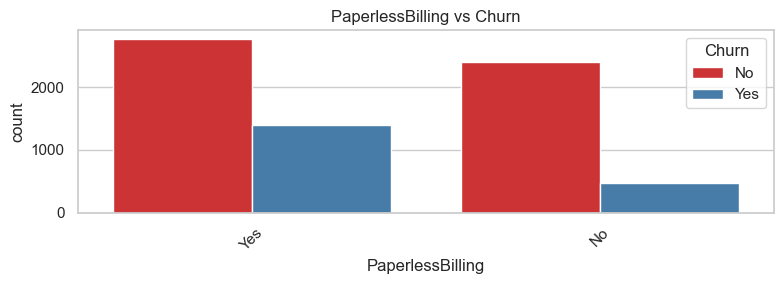

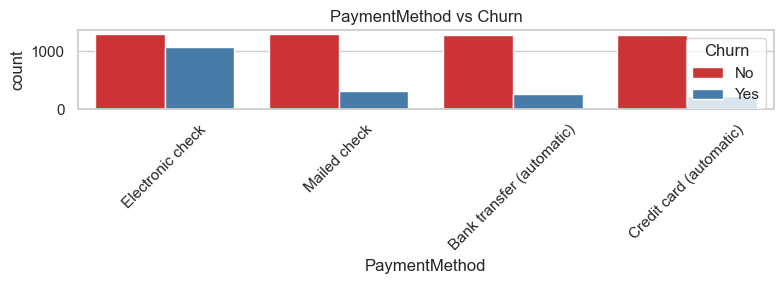

In [9]:
#generando una lista con las columnas categoricas
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Este ciclo itera sobre cada nombre de columna que se encuentra en la lista cat_cols.
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=col, hue='Churn', data=df, palette='Set1')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


mostramos los gráficos del conteo de cada variable categórica 

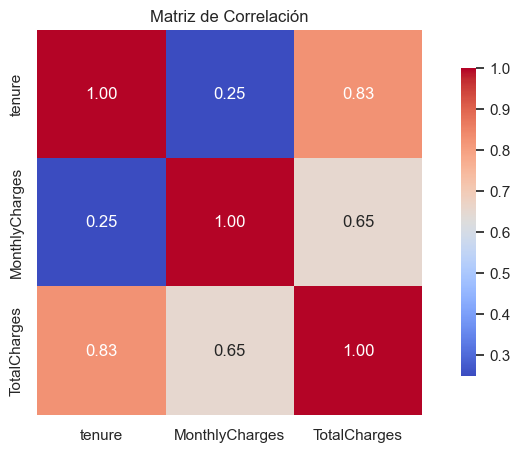

In [10]:
# Realizando la matriz de correlación
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()


donde las variables con mejor correlación son 'tenue' y 'TotalCharges' con 0.83

# _Pregunta 2_

### **Limpieza de datos**

In [11]:
# Convertir TotalCharges a numérico (algunas filas están como string o vacías)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Eliminar filas con valores nulos (pocas, usualmente en TotalCharges)
df = df.dropna()

# Reiniciar el índice
df.reset_index(drop=True, inplace=True)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Transformando variables categoricas**

In [12]:
# Eliminamos ID del cliente (no aporta valor predictivo)
df.drop('customerID', axis=1, inplace=True)

# Codificamos 'gender' primero (Male = 1, Female = 0)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Columnas binarias que se pueden codificar con 0 y 1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Aplicar¿mos la codificación binaria (Yes = 1, No = 0)
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Columnas categóricas nominales (multiclase)
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# One-hot encoding con drop_first=True para evitar multicolinealidad
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Verificamos resultado
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


### **Asegurando los tipos correctos para las numéricas**

In [13]:
# Verificamos que estas columnas sean numéricas
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']].astype(float)


### **Normalización de características numéricas**

In [14]:
# Variables numéricas a escalar
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#creamos una instancia del escalador
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols]) #acá calculamos la desviación estándar
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,True,False


In [15]:
# Separamos las variables predictoras (X) y target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

 #Eliminamos las filas con NaN en X
X = X.dropna()

 #Alineamos y con los índices de X después de eliminar NaNs
y = y.loc[X.index]


# _Pregunta 3_

In [16]:
# Dividimos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% para prueba
    random_state=42,      # Semilla para reproducibilidad
    stratify=y            # Mantener proporción de clases en ambos conjuntos
)

# Verificamos los tamaños
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (5625, 30)
Tamaño del conjunto de prueba: (1407, 30)


hemos dividido el conjunto de datos original en dos partes: una más grande (5625 muestras) para enseñar al modelo, y una más pequeña (1407 muestras) para verificar su rendimiento. Ambos conjuntos tienen el mismo número de características (30).

# _Pregunta 4_

### **Verificando errores en el data frame**

In [17]:
# Codificamos las variables categóricas automáticamente
X_encoded = pd.get_dummies(X)

# Codificamos la variable target (Churn: Yes/No -> 1/0)
y_encoded = df['Churn'].map({'No': 0, 'Yes': 1})

print(df['Churn'].unique())

[0 1]


In [18]:
# Asegurarmos que todo es string antes de usar .str
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()

# Mapeamos a 0 y 1
y_encoded = df['Churn'].map({'no': 0, 'yes': 1})


In [19]:
print(df['Churn'].unique())
print(y_encoded.unique())
print("Total de NaN en y_encoded:", y_encoded.isna().sum())


['0' '1']
[nan]
Total de NaN en y_encoded: 7032


### **Dividir en entrenamiento y prueba**

In [20]:
# Definimos el modelo base con Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Hiperparámetros a probar
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Búsqueda con validación cruzada
grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

# Evaluación
print("Mejor modelo de Regresión Logística:", grid_log.best_params_)
y_pred_log = grid_log.predict(X_test)
print("Reporte Logístico:\n", classification_report(y_test, y_pred_log))

Mejor modelo de Regresión Logística: {'C': 0.1, 'solver': 'lbfgs'}
Reporte Logístico:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



**Interpretación**:

El modelo tiene una precisión general del 81%.
Es significativamente mejor prediciendo la clase 0 (No Churn) que la clase 1 (Churn). Esto se ve en las métricas de precision, recall y f1-score, que son considerablemente más altas para la clase 0.
El recall bajo para la clase 1 (0.57) es particularmente importante: significa que el modelo solo logra identificar correctamente al 57% de los clientes que realmente van a churnear. Hay un número considerable de falsos negativos (clientes que churnean pero el modelo predice que no).
El desbalance de clases en el conjunto de prueba (1033 vs 374) influye en las métricas generales. La precisión general (accuracy) y el weighted average están más cerca de las métricas de la clase mayoritaria (clase 0).

_En resumen_, el reporte muestra que el modelo de Regresión Logística con los hiperparámetros C=0.1 y solver='lbfgs' logra una buena precisión general, pero tiene dificultades para identificar correctamente a los clientes que van a churnear (clase 1), lo cual es un desafío común en conjuntos de datos desbalanceados.

### **Árbol de Decisión**

In [21]:
#Definimos el modelo base con Arbol de Decisión
tree = DecisionTreeClassifier(random_state=42)

param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

print("Mejor modelo de Árbol:", grid_tree.best_params_)
y_pred_tree = grid_tree.predict(X_test)
print("Reporte Árbol:\n", classification_report(y_test, y_pred_tree))


Mejor modelo de Árbol: {'max_depth': 3, 'min_samples_split': 2}
Reporte Árbol:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.66      0.40      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407



**Interpretación**:

El modelo de Árbol de Decisión con una profundidad máxima de 3 tiene una precisión general del 78%.
Al igual que la Regresión Logística, es mucho mejor prediciendo la clase 0 (No Churn).
La métrica más notable aquí es el recall para la clase 1 (Churn), que es de solo 0.40. Esto significa que el modelo de Árbol de Decisión solo logra identificar correctamente al 40% de los clientes que realmente van a churnear. Esto es significativamente más bajo que el recall de la Regresión Logística para la clase 1 (0.57).
Aunque la precisión para la clase 1 es la misma (0.66) que en la Regresión Logística, el recall mucho más bajo resulta en un f1-score más bajo para la clase 1 (0.50 vs 0.61).

_En resumen_, el modelo de Árbol de Decisión con una profundidad limitada (3) es más simple y tiene una precisión general ligeramente menor (78% vs 81% de la Regresión Logística). Su principal debilidad, al igual que la Regresión Logística, es la predicción de la clase minoritaria (Churn), y en este caso, su capacidad para identificar a los clientes que churnean (recall) es considerablemente peor que la del modelo de Regresión Logística.

### **Random Forest**

In [22]:
#definimos el modelo base con Random Forest
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Mejor modelo de Random Forest:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
print("Reporte Random Forest:\n", classification_report(y_test, y_pred_rf))


Mejor modelo de Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Reporte Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**Interpretación**:

El modelo de Random Forest tiene una precisión general del 79%.
Al igual que los modelos anteriores, se desempeña mejor prediciendo la clase 0 (No Churn).
Para la clase 1 (Churn), el recall es de 0.50, lo que significa que identifica correctamente al 50% de los clientes que realmente van a churnear. Esto es mejor que el Árbol de Decisión (0.40) pero ligeramente peor que la Regresión Logística (0.57).
La precisión para la clase 1 es 0.64, similar a los otros modelos.
El f1-score para la clase 1 es 0.56, también intermedio entre el Árbol de Decisión (0.50) y la Regresión Logística (0.61).

_En resumen_, el modelo de Random Forest con los hiperparámetros encontrados logra una precisión general del 79%. Su rendimiento en la identificación de la clase minoritaria (Churn) es mejor que el del Árbol de Decisión simple, pero no supera al de la Regresión Logística en términos de recall para esa clase. Es un modelo robusto, pero sigue enfrentando el desafío común de predecir la clase minoritaria en conjuntos de datos desbalanceados.

# _Pregunta 5_

### **Matriz de Confusión para cada modelo**

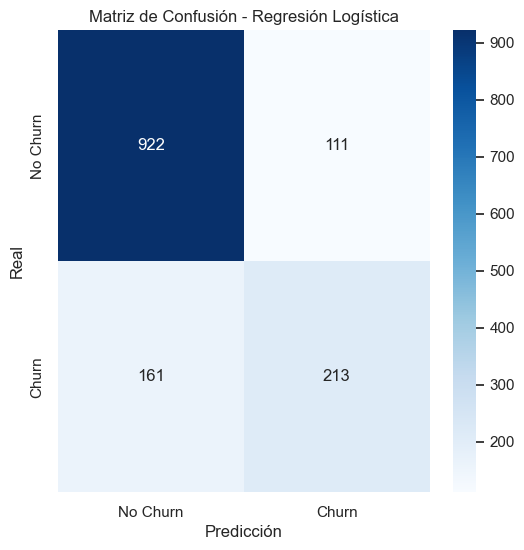

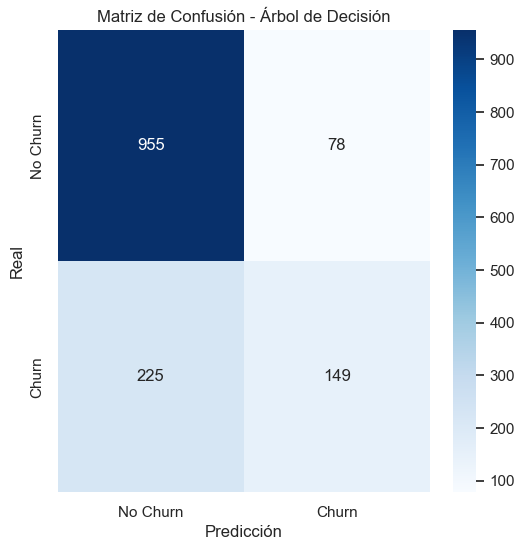

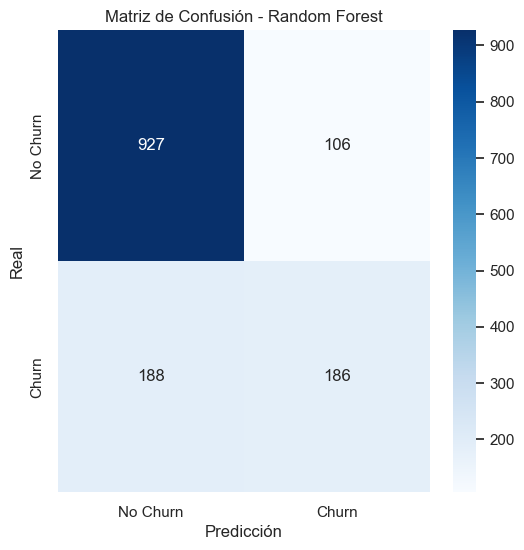

In [23]:
# Definimos una función para graficar matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title="Matriz de Confusión"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

# Matriz de Confusión para Regresión Logística
plot_confusion_matrix(y_test, y_pred_log, "Matriz de Confusión - Regresión Logística")

# Matriz de Confusión para Árbol de Decisión
plot_confusion_matrix(y_test, y_pred_tree, "Matriz de Confusión - Árbol de Decisión")

# Matriz de Confusión para Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusión - Random Forest")


### **Importancia de Características en Random Forest**

Importancia de características en Random Forest:
                           Característica  Importancia
4                                  tenure     0.190514
8                            TotalCharges     0.166492
7                          MonthlyCharges     0.115855
11            InternetService_Fiber optic     0.067745
28         PaymentMethod_Electronic check     0.061136
26                      Contract_Two year     0.055383
25                      Contract_One year     0.034718
14                     OnlineSecurity_Yes     0.032585
20                        TechSupport_Yes     0.027440
6                        PaperlessBilling     0.022167
13     OnlineSecurity_No internet service     0.016429
16                       OnlineBackup_Yes     0.016044
10                      MultipleLines_Yes     0.015845
1                           SeniorCitizen     0.015510
3                              Dependents     0.015509
0                                  gender     0.013488
2               

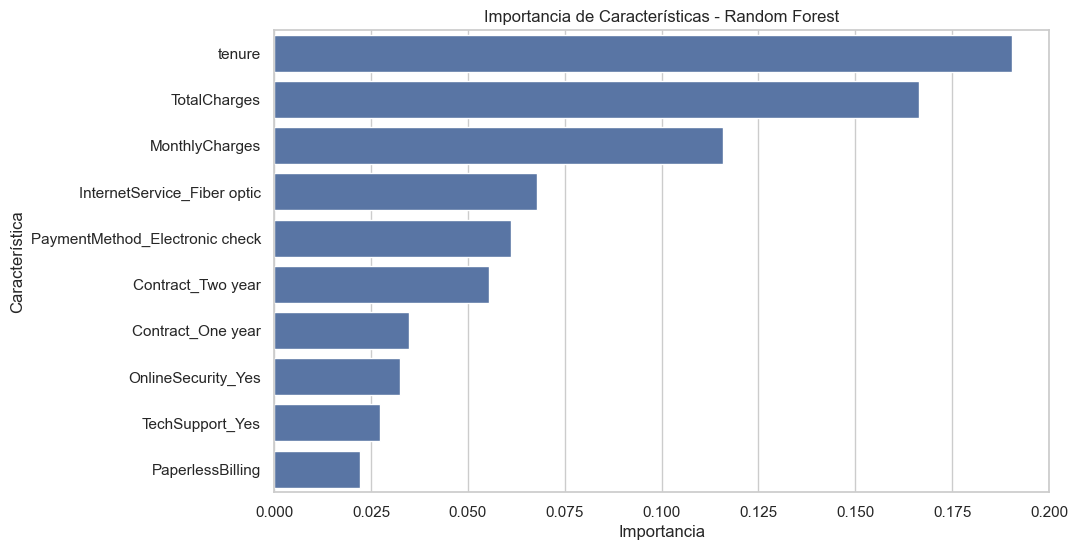

In [24]:
# Mostramos la importancia de características en el modelo Random Forest
importances = grid_rf.best_estimator_.feature_importances_

# Creamos un DataFrame para ordenar y mostrar la importancia de las características
feature_importances = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print("Importancia de características en Random Forest:")
print(feature_importances)

# Graficamos las 10 características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importances.head(10))
plt.title('Importancia de Características - Random Forest')
plt.show()


### **Comparación de Resultados de Modelos**

In [25]:
# Evaluamos la precisión de cada modelo
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Mostramos la  comparación de precisión
print(f"Precisión de Regresión Logística: {acc_log:.4f}")
print(f"Precisión de Árbol de Decisión: {acc_tree:.4f}")
print(f"Precisión de Random Forest: {acc_rf:.4f}")


Precisión de Regresión Logística: 0.8067
Precisión de Árbol de Decisión: 0.7846
Precisión de Random Forest: 0.7910


### **Métricas adicionales: Precisión, Recall y F1-score**

In [26]:
# Métricas para Regresión Logística
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Métricas para Árbol de Decisión
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Métricas para Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Mostrar las métricas
print(f"Regresión Logística - Precisión: {precision_log:.4f}, Recall: {recall_log:.4f}, F1: {f1_log:.4f}")
print(f"Árbol de Decisión - Precisión: {precision_tree:.4f}, Recall: {recall_tree:.4f}, F1: {f1_tree:.4f}")
print(f"Random Forest - Precisión: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1: {f1_rf:.4f}")


Regresión Logística - Precisión: 0.6574, Recall: 0.5695, F1: 0.6103
Árbol de Decisión - Precisión: 0.6564, Recall: 0.3984, F1: 0.4958
Random Forest - Precisión: 0.6370, Recall: 0.4973, F1: 0.5586


Precisión (Precision):

Significado: De todos los clientes que el modelo predijo que iban a churnear, ¿qué porcentaje realmente churnearon? Una alta precisión significa que cuando el modelo dice que alguien va a churnear, es muy probable que acierte (pocos falsos positivos).
Comparación:
Regresión Logística: 0.6574
Árbol de Decisión: 0.6564
Random Forest: 0.6370
Interpretación: Los tres modelos tienen una precisión similar para la clase Churn, alrededor del 64-66%. Esto significa que, cuando cualquiera de estos modelos predice que un cliente va a churnear, aciertan aproximadamente 2 de cada 3 veces. La Regresión Logística y el Árbol de Decisión son marginalmente mejores en este aspecto.
Recall (Sensibilidad):

Significado: De todos los clientes que realmente churnearon, ¿qué porcentaje pudo identificar correctamente el modelo? Un alto recall significa que el modelo es bueno encontrando a la mayoría de los clientes que van a churnear (pocos falsos negativos). Esta métrica es a menudo muy importante en problemas de detección (como churn, fraude, enfermedades) donde no quieres perderte casos positivos reales.
Comparación:
Regresión Logística: 0.5695
Árbol de Decisión: 0.3984
Random Forest: 0.4973
Interpretación: Aquí hay diferencias más notables. La Regresión Logística tiene el recall más alto (casi 0.57), lo que significa que identifica correctamente a casi el 57% de los clientes que realmente churnean. Random Forest identifica al 50%, y el Árbol de Decisión es el peor, identificando solo al 40%. Si tu objetivo principal es no perderte a los clientes que van a churnear, la Regresión Logística es el mejor modelo de los tres según esta métrica.
F1-score:

Significado: Es la media armónica de la Precisión y el Recall. Proporciona un balance entre ambas métricas. Es una buena métrica general para evaluar el rendimiento en la clase minoritaria, especialmente cuando hay un desbalance significativo.
Comparación:
Regresión Logística: 0.6103
Random Forest: 0.5586
Árbol de Decisión: 0.4958
Interpretación: El F1-score confirma que la Regresión Logística ofrece el mejor balance entre identificar correctamente a los churners (Recall) y que sus predicciones de churn sean correctas (Precision). Random Forest es el segundo mejor, y el Árbol de Decisión es el que peor se desempeña en general para la clase minoritaria.
Conclusión:

Basado en estas métricas específicas para la clase minoritaria (Churn):

La Regresión Logística es el modelo con el mejor rendimiento, destacando especialmente en Recall y teniendo el F1-score más alto. Es el que mejor identifica a los clientes que realmente van a churnear.
Random Forest es el segundo mejor, con un Recall y F1-score intermedios entre los otros dos.
El Árbol de Decisión es el que peor se desempeña para predecir la clase Churn, particularmente con un Recall muy bajo.
Esto sugiere que, si el objetivo principal es identificar a la mayor cantidad posible de clientes que van a churnear (incluso si eso significa tener algunos falsos positivos más), la Regresión Logística es la opción preferida entre estos tres modelos.